# Manifold Learning

## Intro

A **manifold** is a topological space that locally resembles Euclidean space near each point. More formally, each point of an n-dimensional manifold has a neighbourhood that is homeomorphic to Euclidean space of dimension n. <br>
<br>
Manifold learning is a class of methods for non-linear dimensionality reduction. Many high dimensional datasets can be represented as lower dimensional manifolds that are embedded in this high dimensional space. We seek to learn this lower dimensional representation, sometimes referred to as the intrinsic dimensionality, of the data. <br>
<br>
In this notebook, I go over some of the methods of non-linear dimensionality reduction and manifold learning in more detail. <br>

![title](manifold5-1.png)

In [1]:
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (6.5, 6.5)

# plotting style
plt.style.use('classic')
plt.style.use('dark_background')
#plt.style.use('bmh')

import seaborn as sns

from IPython.display import Image

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

import warnings
warnings.filterwarnings('ignore');

# Locally Linear Embedding

- **Local Linear Embedding (LLE)** Local linear Embedding seeks a mapping of the data to a lower dimension which preserves local linear relationships within neighborhoods.

We show a few examples first to motivate the algorithm before going through implementation and algorithm details

## 3D examples

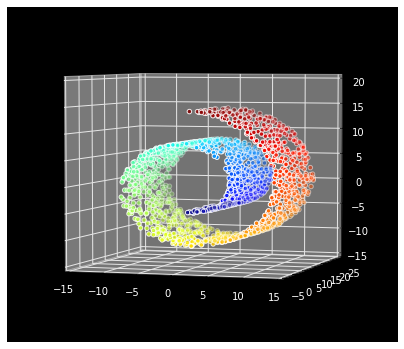

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import ipympl
%matplotlib inline

# swiss roll dataset
from sklearn.datasets.samples_generator import make_swiss_roll
X, color = make_swiss_roll(n_samples = 2000, random_state=8888)
fig = plt.figure(figsize = (7, 6))
ax = fig.gca(projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(4, -72);

This toy dataset shows nonlinear relationships in 3D. A reasonable approximation for this data is a 2D manifold embedded in a higher dimension, as you can see the locally approximate, linear relationships of the data.

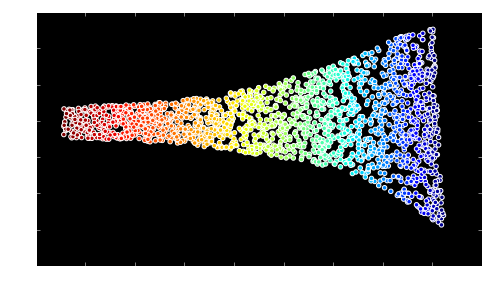

In [3]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors=10) 
X_reduced = lle.fit_transform(X)
X_reduced = X_reduced*20
%matplotlib inline
fig = plt.figure(figsize = (8, 10))
ax = fig.add_subplot(211)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.jet);

Using scikit-learn's LLE implementation, we can preserve the intrinsic structure of the dataset with this mapping to 2 dimensions. The points within each of the local neighbourhoods in 3 dimensions are also close to the same neighboring points in 2 dimensions.

Another example using Scikit-learn's manifold package:

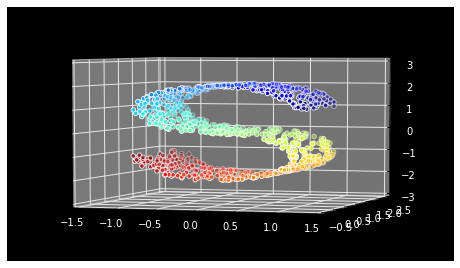

In [4]:
from sklearn.datasets.samples_generator import make_s_curve
X, color = make_s_curve(1000, random_state=0)
fig = plt.figure(figsize = (8, 10))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color)
ax.view_init(4, -72);

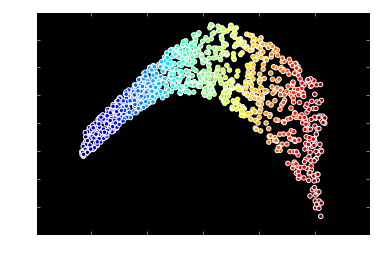

In [5]:
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)
X_reduced = X_reduced*20
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color);

Here are some examples of compact manifolds (pretty sure?) in $\mathbb{R^3}$

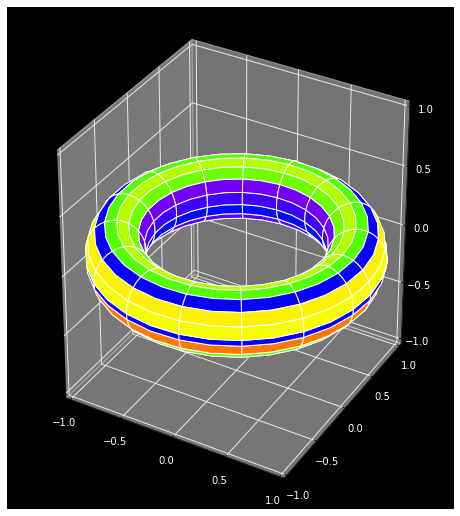

In [6]:
# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

%matplotlib inline
# Display the mesh
fig = plt.figure(figsize=(8,9))
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, cmap=plt.cm.prism, rstride = 2, cstride = 2)
plt.show();

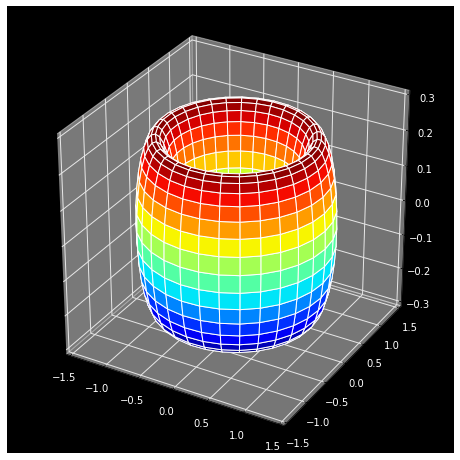

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride = 1, cstride = 1);

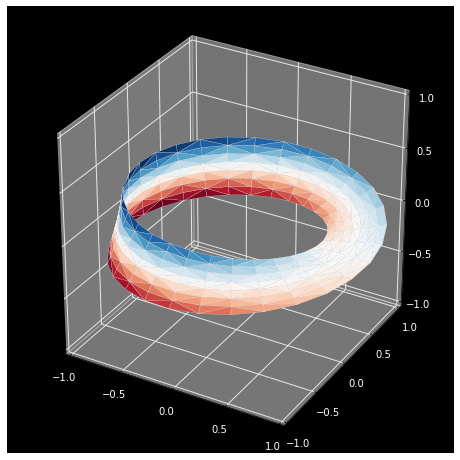

In [8]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

phi = 0.5 * theta

# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap=plt.cm.RdBu, linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

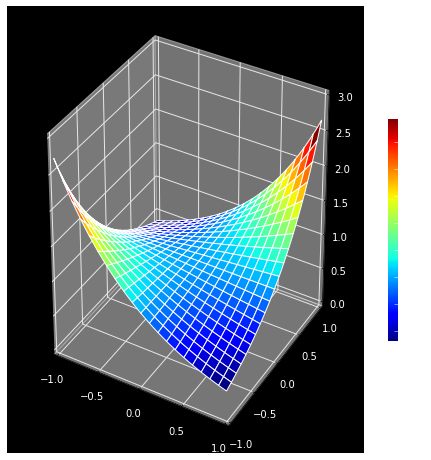

In [9]:
f = plt.figure(figsize=(8,8))
a = f.gca(projection='3d')
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
X, Y = np.meshgrid(x,y)
Z = np.exp(X*Y)
s = a.plot_surface(X,Y,Z,cmap=plt.cm.jet)
f.colorbar(s,shrink=0.5)
plt.show();

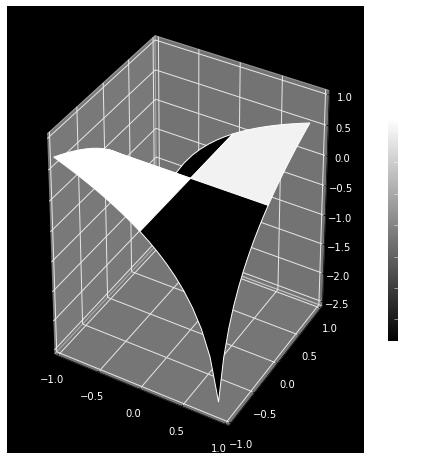

In [10]:
f = plt.figure(figsize=(8,8))
a = f.gca(projection='3d')
x = np.arange(-1,1,0.1)
y = np.arange(-1,1,0.1)
X, Y = np.meshgrid(x,y)
Z = np.log1p(X*Y)
s = a.plot_surface(X,Y,Z,cmap=plt.cm.binary_r)
f.colorbar(s,shrink=0.5)
plt.show();

In [11]:
import ipyvolume as ipv
#ipv.pylab.clear()
ipv.pylab.figure(height=250, width=250)
x_saddle = np.arange(-5, 5)
y_saddle = np.arange(-5, 5)
x_saddle, y_saddle = np.meshgrid(x_saddle, y_saddle)
z_saddle = x_saddle**2/10. - y_saddle**2/10


ipv.plot_surface(x_saddle, z_saddle, y_saddle, color="black")
ipv.plot_wireframe(x_saddle, z_saddle, y_saddle, color="green")
#ipv.show()

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

Mesh(color=array('black', dtype='<U5'), line_material=ShaderMaterial(), material=ShaderMaterial(side='DoubleSi…

Mesh(color=array('green', dtype='<U5'), line_material=ShaderMaterial(), lines=array([[ 0, 10],
       [ 0,  1]…

In [12]:
# f(u, v) -> (u, v, u*v**2)
import ipyvolume as ipv
ipv.pylab.clear()
a = np.arange(-4, 4)
U, V = np.meshgrid(a, a)
X = U
Y = V
Z = X*Y**2

ipv.plot_surface(X, Z, Y, color="black")
ipv.plot_wireframe(X, Z, Y, color="green")
ipv.show()

Mesh(color=array('black', dtype='<U5'), line_material=ShaderMaterial(), material=ShaderMaterial(side='DoubleSi…

Mesh(color=array('green', dtype='<U5'), line_material=ShaderMaterial(), lines=array([[ 0,  8],
       [ 0,  1]…

In [13]:
ipv.pylab.clear()
#ipv.pylab.figure(height=250, width=250)
a = np.arange(-10, 10)
U, V = np.meshgrid(a, a)
X = U
Y = V
Z = np.log(X*Y)

ipv.plot_surface(X, Z, Y, color="black")
ipv.plot_wireframe(X, Z, Y, color="green")

ipv.show()

Mesh(color=array('black', dtype='<U5'), line_material=ShaderMaterial(), material=ShaderMaterial(side='DoubleSi…

Mesh(color=array('green', dtype='<U5'), line_material=ShaderMaterial(), lines=array([[  0,  20],
       [  0, …